In [6]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

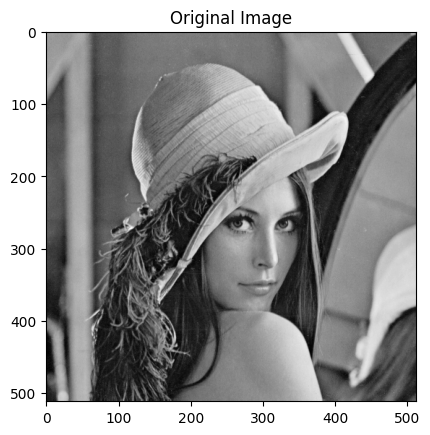

In [7]:
original_image=Image.open('Lenna.png') # 引入图片
original_image=original_image.convert("L") # 灰度处理
original_image=np.array(original_image)
plt.imshow(original_image,cmap='gray')
plt.title("Original Image")
plt.show()

In [8]:
image_array=np.zeros((64*64,64))
idx=0
for i in range(0,512,8):
    for j in range(0,512,8):
        image_array[idx]=original_image[i:i+8,j:j+8].reshape(1,64)
        idx+=1
print(image_array)


[[162. 162. 162. ... 159. 156. 157.]
 [165. 161. 162. ... 153. 153. 151.]
 [157. 156. 161. ... 153. 152. 152.]
 ...
 [ 84.  82.  75. ...  41.  42.  50.]
 [ 52.  49.  52. ...  72.  76.  83.]
 [ 57.  51.  61. ... 104. 105. 108.]]


In [9]:
rate=1e-10
epochs=1000
w=np.random.randn(1,64)
Y=np.zeros((4096,1))
for i in range(epochs):
    Y=np.dot(image_array,w.T)
    w=w+rate*(np.dot(Y.T,image_array)-np.dot(Y.T,Y)*w)
print(w)
print(Y)

Y=np.dot(image_array,w.T)
X=np.dot(Y,w)
print(X)

[[-0.12401806 -0.12434491 -0.12478978 -0.12499535 -0.12536902 -0.12549367
  -0.12526018 -0.12502948 -0.12417439 -0.12454527 -0.12496461 -0.1253756
  -0.12554077 -0.12563061 -0.12537284 -0.1251122  -0.12424989 -0.12476979
  -0.12517022 -0.12554999 -0.12560981 -0.12555997 -0.12539011 -0.1250508
  -0.12442732 -0.12499383 -0.12533978 -0.12550018 -0.12556631 -0.12559402
  -0.12532169 -0.1249201  -0.12448442 -0.12515625 -0.12532378 -0.12529976
  -0.1254235  -0.12538427 -0.12511748 -0.12482751 -0.12456502 -0.12493069
  -0.12506463 -0.1250347  -0.12502405 -0.12515389 -0.12511093 -0.12482052
  -0.12441747 -0.12475327 -0.12484923 -0.12490642 -0.12487185 -0.12502324
  -0.12503689 -0.12474244 -0.12430331 -0.12458129 -0.12480072 -0.12483763
  -0.12484103 -0.12495993 -0.12476327 -0.12452123]]
[[-1283.49192872]
 [-1270.35620073]
 [-1247.00087857]
 ...
 [ -443.63795545]
 [ -463.2661028 ]
 [ -698.84596617]]
[[159.17617332 159.59569392 160.16667868 ... 160.3850555  160.13265206
  159.8219904 ]
 [157.547

[[159.17617332 159.59569392 160.16667868 ... 136.5411039  136.28705749
  136.03604424]
 [159.37683117 159.85284827 160.39106251 ... 136.69009975 136.40962958
  136.12604787]
 [159.47373211 160.14101468 160.65497272 ... 136.61324245 136.42842425
  136.05924051]
 ...
 [ 50.21964578  50.3670695   50.42106875 ...  87.46328989  87.4332687
   87.23031745]
 [ 50.16015759  50.2955397   50.33422813 ...  87.37198695  87.38152819
   87.17574989]
 [ 50.11413338  50.22620244  50.31466864 ...  87.32773971  87.19030906
   87.02115752]]


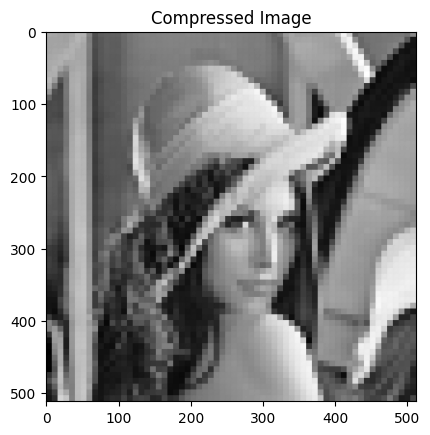

In [10]:
new_image=np.zeros([512,512])
idx=0
for i in range(0,512,8):
    for j in range(0,512,8):
        new_image[i:i+8,j:j+8]=X[idx].reshape(8,8)
        idx+=1
print(new_image)

plt.imshow(new_image,cmap="gray")
plt.title("Compressed Image")
plt.savefig('Compressed.png',dpi=600)
plt.show()

